In [1]:
# JBY: Set up env using "ipython --pylab" imports
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
interactive = False
if interactive:
    %matplotlib osx
else:
    %matplotlib inline
figsize(17,6)
rcParams['font.size'] = 14

## sliding_percentiles

In [3]:
def sliding_percentiles(xx, yy, n_bins=10,
                        percentiles=[2.5, 16, 50, 84, 97.5],
                        lw=[1, 2, 3, 2, 1],
                        color='k',
                        fill_color=(0, 0, 0, .2),
                        skip_plot=False):
    if not isinstance(lw, list): lw = [lw] * len(percentiles)
    if not isinstance(color, list): color = [color] * len(percentiles)
    if not isinstance(fill_color, list): fill_color = [fill_color] * (len(percentiles) - 1)
    
    bins = linspace(tt.min(), tt.max(), n_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    pct = array([percentile(yy[(tt >= bins[ii]) & (tt < bins[ii+1])], percentiles) for ii in range(len(bins) - 1)])
    
    if not skip_plot:
        for ii in range(pct.shape[1]):
            plot(bin_centers, pct[:,ii], color=color[ii % len(color)], lw=lw[ii % len(lw)])
        for ii in range(pct.shape[1] - 1):
            fill_between(bin_centers, pct[:,ii], pct[:,ii + 1], color=fill_color[ii % len(fill_color)], zorder=10)
    
    return bin_centers, pct

## Example: make some data

In [4]:
N = 10000
tt = linspace(0, 100, N)
yy = random.normal(0, 1, tt.shape) + .01 * tt

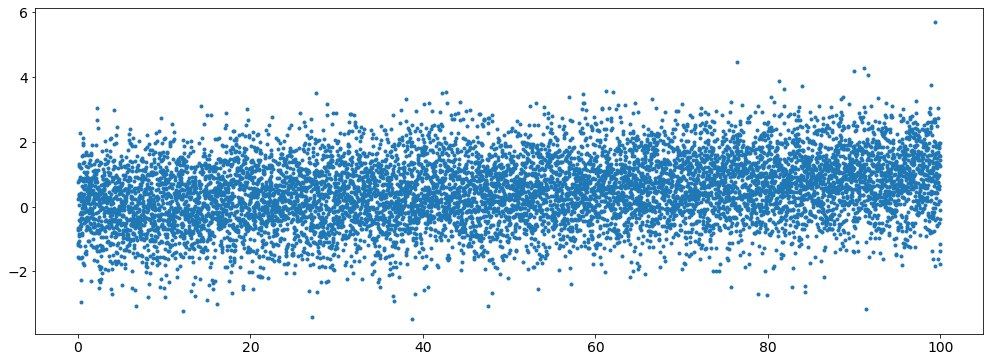

In [5]:
plot(tt, yy, '.')

## Example: plot percentiles

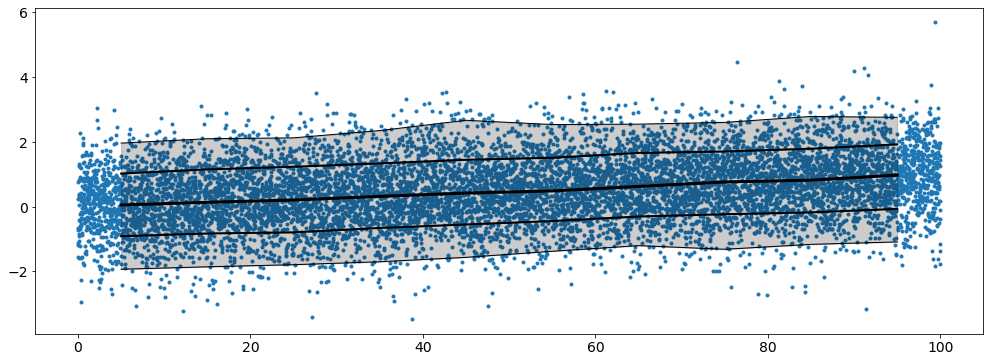

In [6]:
plot(tt, yy, '.')
_=sliding_percentiles(tt, yy)

Or a bit prettier, with transparency and with min/max shown too:

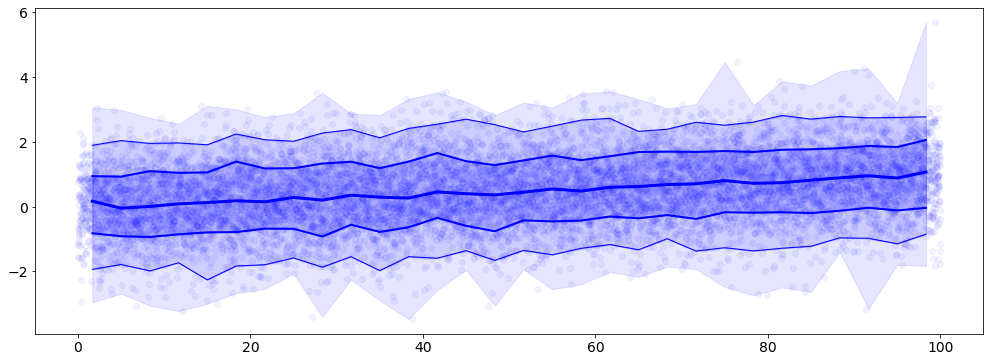

In [7]:
plot(tt, yy, 'o', c=(0, 0, 1, .05))
_=sliding_percentiles(tt, yy, n_bins=30,
                     color='b',
                     percentiles=[0, 2.5, 16, 50, 84, 97.5, 100],
                     lw=[0, 1, 2, 3, 2, 1, 0],
                     fill_color=[(0, 0, 1, .1),
                                 (0, 0, 1, .2),
                                 (0, 0, 1, .3),
                                 (0, 0, 1, .3),
                                 (0, 0, 1, .2),
                                 (0, 0, 1, .1)]
                     )